In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim
torch.random.seed = 42

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Load the MNIST dataset

In [2]:
mnist_trainset = datasets.MNIST(root='../data', train=True, download=True,
                                transform=None)

mnist_testset = datasets.MNIST(root='../data', train=False, download=True,
                               transform=None)

In [3]:
print(mnist_trainset)
print('')
print(mnist_testset)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../data
    Transforms (if any): None
    Target Transforms (if any): None

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../data
    Transforms (if any): None
    Target Transforms (if any): None


In [4]:
mnist_trainset.data[0].size()

torch.Size([28, 28])

In [5]:
size_len = mnist_trainset.data[0].size()[0]

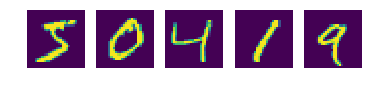

In [6]:
fig = plt.figure(1)
for i, img in enumerate(mnist_trainset.data[0:5]):
    ax = fig.add_subplot(1,5,i+1)
    ax.set_axis_off()
    ax = plt.imshow(img)
plt.show()

## Net architecture and train/test routines

In [7]:
class Net(nn.Module):
    """MLP with 4 ReLU hidden layers and 1 softmax output layer"""
    
    def __init__(self, H, C):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(size_len*size_len, H)
        self.fc2 = nn.Linear(H, H)
        self.fc3 = nn.Linear(H, H)
        self.fc4 = nn.Linear(H, C)
        self.fc5 = nn.Linear(C, 1)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax()
        
    def forward(self, x):
        x = x.view(-1, size_len*size_len)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.softmax(self.fc5(x))
        return x

In [8]:
def train(model, x_train, y_train, optimizer, criterion, epoch):
    model.train()
    
    optimizer.zero_grad()
    output = model(x_train)
    y_pred = output
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    
    print("Train Epoch: {}\tLoss: {:.6f}".format(epoch, loss.item()))

In [9]:
def test(model, x_test, y_test, criterion):
    model.eval()

    with torch.no_grad():
        output = model(x_test)
        y_pred = output
        test_loss = criterion(y_pred, y_train)

    print("\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n".format(test_loss))


## Training

In [10]:
X_train = mnist_trainset.data.float()
y_train = mnist_trainset.targets

X_test = mnist_testset.data.float()
y_test = mnist_testset.targets

In [11]:
model = Net(100, 10)
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=100, bias=True)
  (fc4): Linear(in_features=100, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
  (softmax): LogSoftmax()
)


In [12]:
alpha = 0.1
gamma = 10
max_epoch = 100
optimizer = optim.SGD(model.parameters(), lr=alpha)
criterion = torch.nn.NLLLoss()

In [13]:
epoch = count = 0

In [14]:
for epoch in range(100):
    train(model, X_train, y_train, optimizer, criterion, epoch)
    test(model, X_test, y_test, criterion)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


RuntimeError: Assertion `cur_target >= 0 && cur_target < n_classes' failed.  at /pytorch/aten/src/THNN/generic/ClassNLLCriterion.c:93

In [ ]:
X_train